In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit   
import itertools
import pandas as pd


Import Data

In [3]:
df = pd.read_csv("Data/Prélèvement et mesures du 02_05 - Data.csv")
def cumulative_with_zero(col):
    return pd.Series([0] + list(np.cumsum(col)))

# Appliquer à chaque colonne
df_cumsum = df.apply(cumulative_with_zero)

Plot each and linear fit

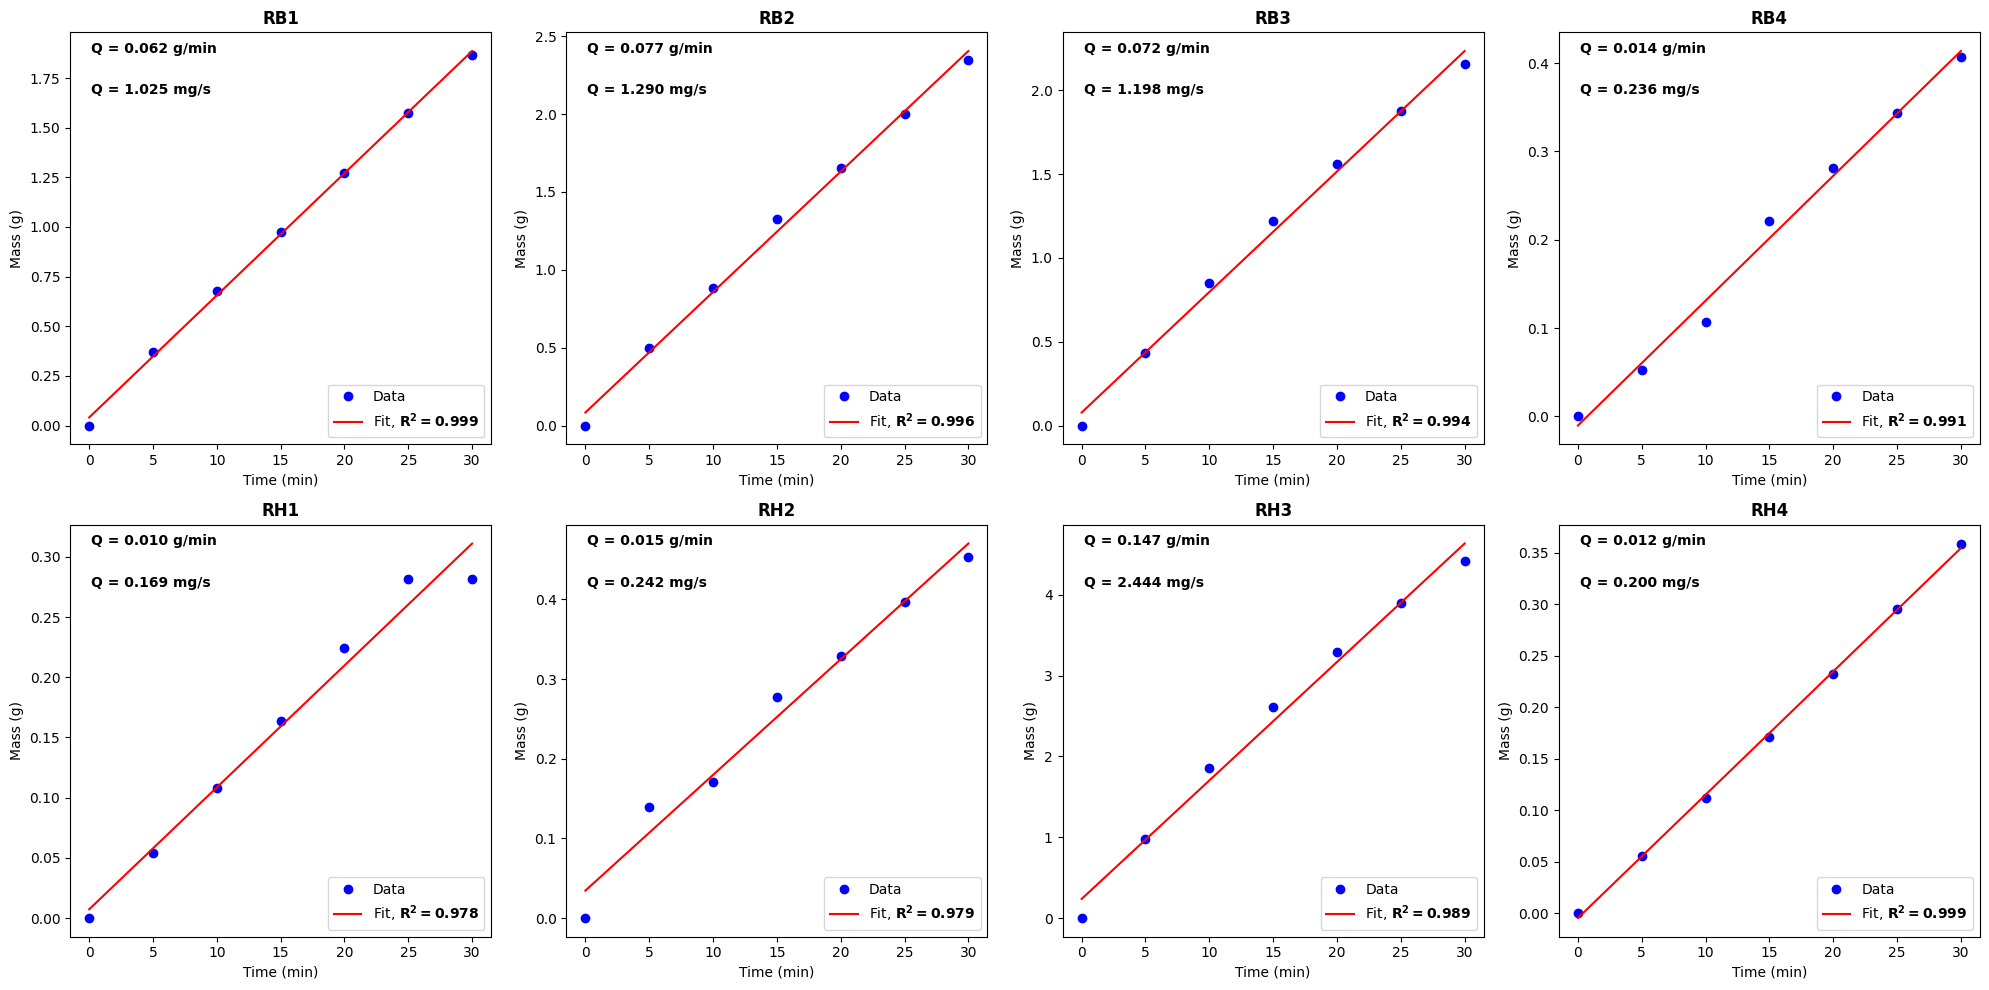

In [4]:
colonnes = ["RB1", "RB2", "RB3", "RB4", "RH1", "RH2", "RH3", "RH4"]

# Axe des temps en minutes
minutes = np.array([0, 1, 2, 3, 4, 5, 6]) * 5

# Fonction affine pour l'ajustement
def func(x, a, b):
    return a * x + b

# Création de la figure avec 8 sous-graphiques (2 lignes, 4 colonnes)
fig, axs = plt.subplots(2, 4, figsize=(20, 10), dpi=100)
axs = axs.flatten()

for i, col in enumerate(colonnes):
    ydata = df_cumsum[col]
    
    # Ajustement linéaire
    popt, _ = curve_fit(func, minutes, ydata)
    
    # Calcul de R²
    residuals = ydata - func(minutes, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot
    ax = axs[i]
    ax.plot(minutes, ydata, 'o', color='blue', label='Data')
    ax.plot(minutes, func(minutes, *popt), 'r-', label=f'Fit, $\\mathbf{{R^2={r_squared:.3f}}}$')
    ax.set_title(col, fontweight='bold')
    ax.set_ylabel('Mass (g)')
    ax.set_xlabel('Time (min)')
    ax.legend()
    
    # Affichage du débit
    ax.text(0.05, 0.95, f'Q = {popt[0]:.3f} g/min', transform=ax.transAxes,
            fontsize=10, color='k', fontweight='bold')
    ax.text(0.05, 0.85, f'Q = {popt[0]*1000/60:.3f} mg/s', transform=ax.transAxes,
            fontsize=10, color='k', fontweight='bold')

plt.tight_layout()
plt.show()

Calcul de la conductivité hydraulique

In [ ]:
hauteurs = [150, 142, 142, 144, 144, 150, 144, 144]
diametres = [9.9,9.2,9.1,7.2,6.9,8.2,9.6,8.0] 
longueurs = [14.8,12.5,14.5,9,14,14,13.5,17]
Q_gmin = []
for i, col in enumerate(colonnes):
    ydata = df_cumsum[col]   
    popt, _ = curve_fit(func, minutes, ydata)
    Q_gmin.append(popt[0]) # en g/min

Q_kgs = [q/(60*1000) for q in Q_gmin] # en kg/s

K = [ q/(1000*9.81*(hauteurs[i]/100))*1e6 for q in Q_kgs] # en kg/s/MPa
K_norm_D = [ K[i]/(np.pi*(diametres[i]/1000)**2/4) for i in range(len(K))] # en kg/s/MPa/m²
K_norm_L = [ K[i]/(longueurs[i]/100) for i in range(len(K))] # en kg/s/MPa/m
K_norm_DL = [K[i]/(np.pi*(diametres[i]/1000)**2/4*longueurs[i]/100) for i in range(len(K))] # en kg/s/MPa/m3
# K_norm_D = []
# for i, col in enumerate(colonnes):
#     ydata = df_cumsum[col]    # Ajustement linéaire
#     popt, _ = curve_fit(func, minutes, ydata)
#     K_norm_D.append(popt[0]/(1000*9.81*(hauteurs[i]/100)*np.pi*(diametres[i]/1000)**2/4))    


Text(0.5, 1.0, 'K_norm_DL')

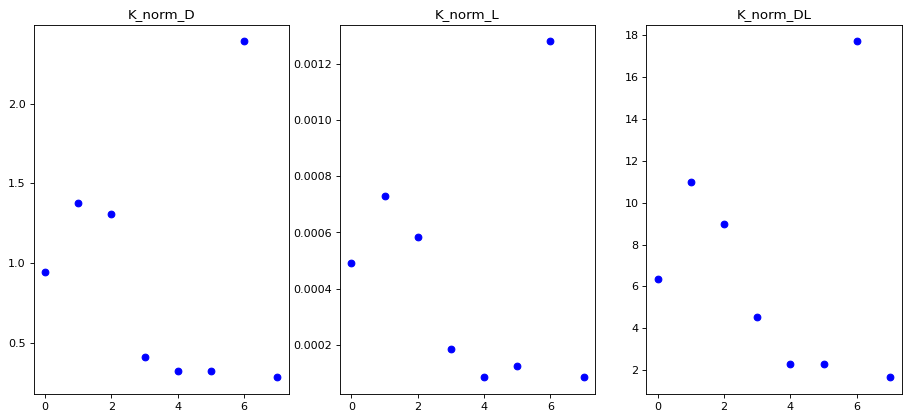

In [6]:
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.subplots(1,3)
ax[0].plot( K_norm_D, 'o', color='blue', label='Data')
ax[0].set_title('K_norm_D')
ax[1].plot( K_norm_L, 'o', color='blue', label='Data')
ax[1].set_title('K_norm_L')
ax[2].plot( K_norm_DL, 'o', color='blue', label='Data')
ax[2].set_title('K_norm_DL')

Total Leaf Area normalization

In [ ]:
leaf_area_RB1 = pd.read_csv("Data/Results_RH4.csv")
total_leaf_area_RB1 = leaf_area_RB1.iloc[:, -1].sum()




np.float64(305.687)

In [27]:
fichiers = [f"Results_RB{i}.csv" for i in range(1, 5)] + [f"Results_RH{i}.csv" for i in range(1, 5)]
totaux = [pd.read_csv(f"Data/{f}").iloc[:, -1].sum() for f in fichiers]
K_leaf = [K[i]/(totaux[i]*1e-4) for i in range(len(K))] # en kg/s/MPa/m²

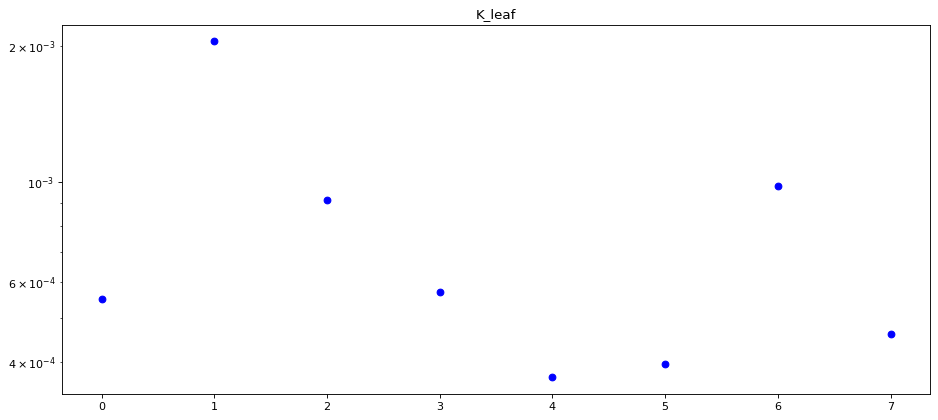

In [29]:
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.subplots(1,1)
ax.plot( K_leaf, 'o', color='blue', label='Data')
ax.set_title('K_leaf') 
plt.yscale('log')  # Met uniquement l'axe des y en échelle log
